# Screening pediatric sera for neutralizing activity against HK/19


In [1]:
import pandas as pd

import neutcurve
from neutcurve.colorschemes import CBMARKERS, CBPALETTE

import matplotlib
from matplotlib import pyplot as plt

import warnings
warnings.filterwarnings("ignore")

In [2]:
neut_data_run1 = pd.read_csv('neut_data/230208_neuts_tidy.csv')

In [3]:
# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_run1)

StopIteration: 

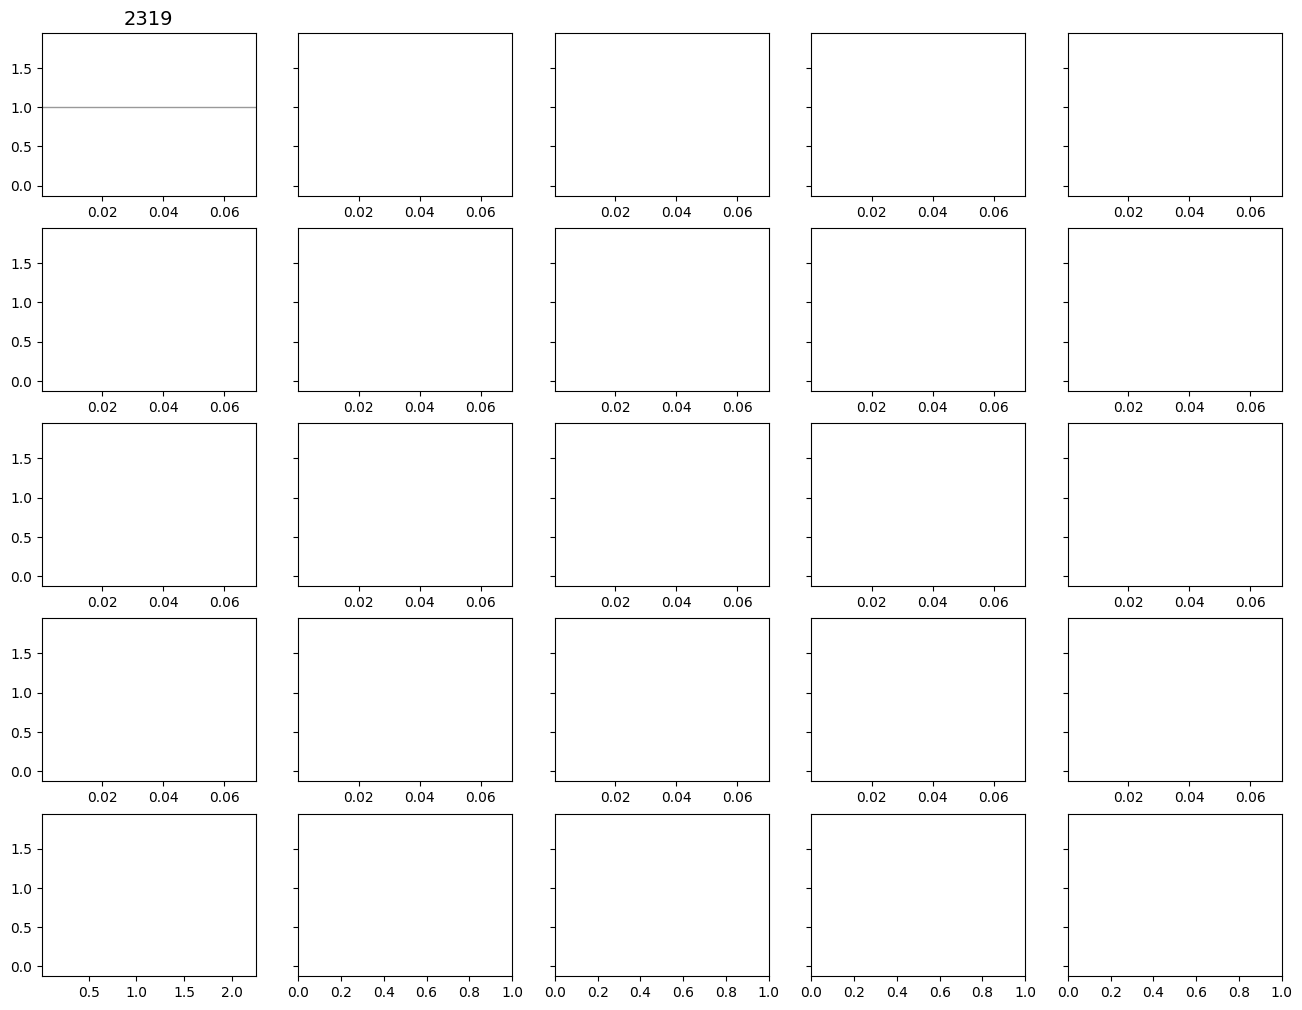

In [4]:
fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 13]])
# plt.savefig('figures/230208_ped-sera-neuts_v1.pdf', bbox_inches=bbox)

In [25]:
neut_data_pbs = pd.read_csv('neut_data/230208_neuts_tidy_PBS.csv')

neut_data_pbs['serum'] =neut_data_pbs['serum'].astype(object)

In [6]:
# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_pbs, fixtop=False, fixbottom=False)

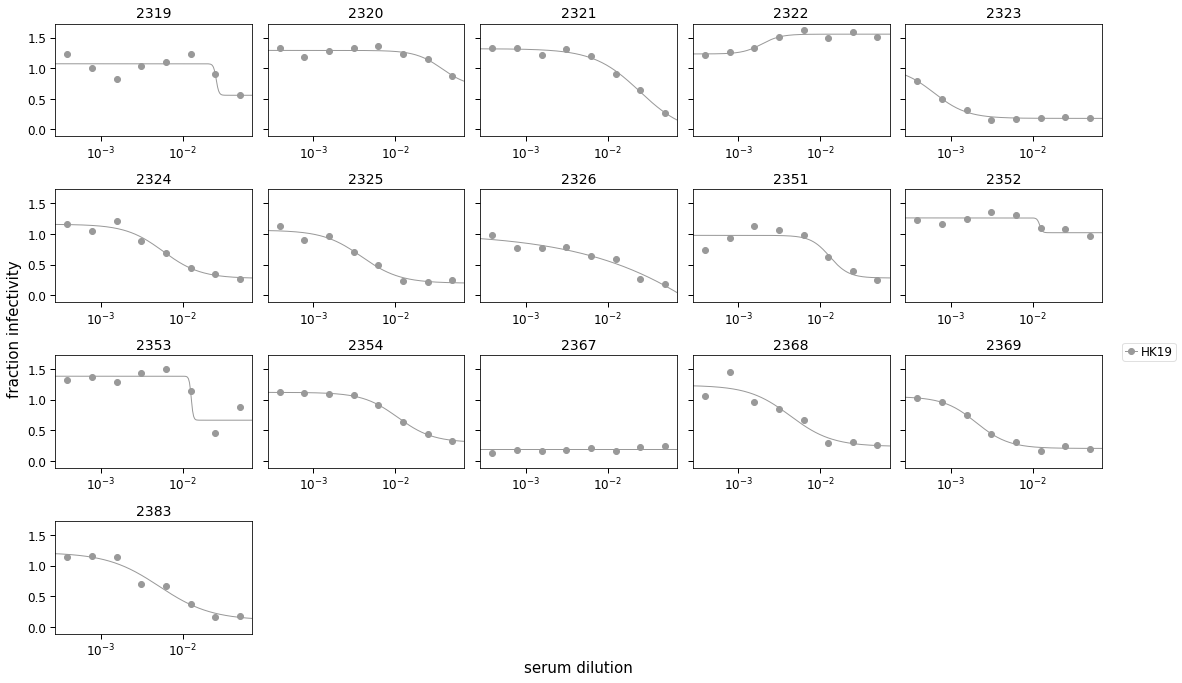

In [7]:
fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 11]])
# plt.savefig('figures/230208_ped-sera-neuts_media-wash.pdf', bbox_inches=bbox)

In [24]:
neut_data_run2 = pd.read_csv('neut_data/230210_neuts_tidy.csv')

# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_run2)

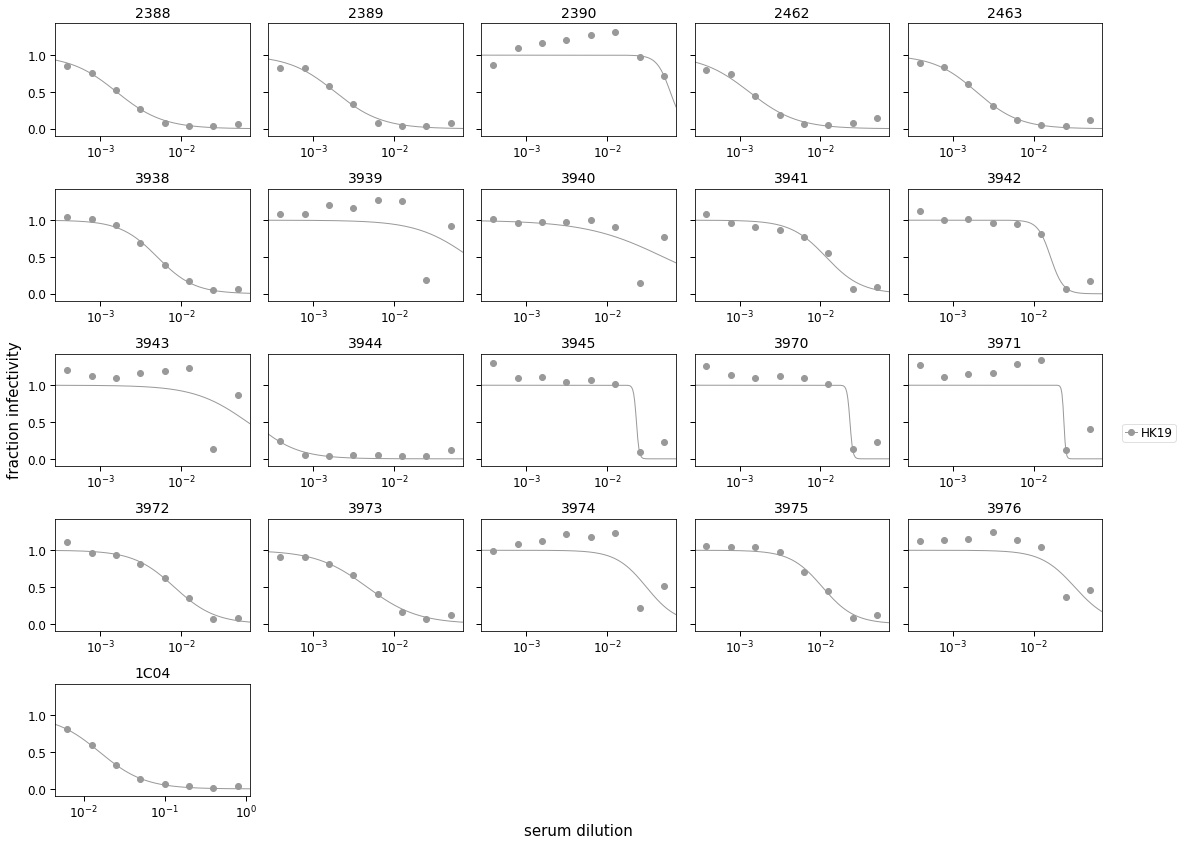

In [9]:
fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 13]])
# plt.savefig('figures/230210_ped-sera-neuts.pdf', bbox_inches=bbox)

In [29]:
neut_data_run2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 168 entries, 0 to 167
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   serum                 168 non-null    object 
 1   virus                 168 non-null    object 
 2   replicate             168 non-null    int64  
 3   concentration         168 non-null    float64
 4   fraction infectivity  168 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 6.7+ KB


In [34]:
full_runs = pd.concat([neut_data_pbs, neut_data_run2])
neut_hits_list = [2323, 2324, 2325, 2354, 2367, 2368, 2369, 2383, '2388', '2389', 
                  '2462', '2463', '3938', '3944', 
                  '3972', '3973', '3975']

neut_hits = full_runs[full_runs['serum'].isin(neut_hits_list)]
neut_hits

,serum,virus,replicate,concentration,fraction infectivity
32,2323,HK19,1,0.050000,0.189758
33,2323,HK19,1,0.025000,0.206016
34,2323,HK19,1,0.012500,0.180577
35,2323,HK19,1,0.006250,0.176743
36,2323,HK19,1,0.003125,0.162464
...,...,...,...,...,...
147,3975,HK19,1,0.006250,0.706487
148,3975,HK19,1,0.003125,0.975298
149,3975,HK19,1,0.001563,1.048375
150,3975,HK19,1,0.000781,1.038673


In [35]:
fits = neutcurve.CurveFits(neut_hits)

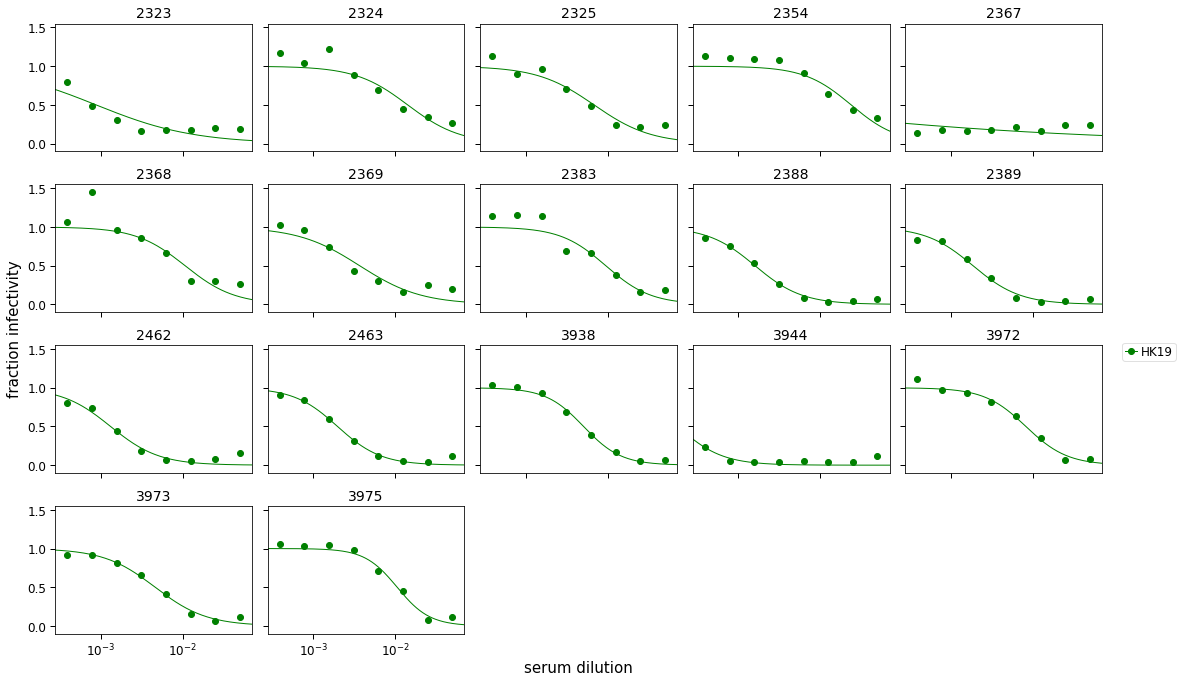

In [38]:
fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          virus_to_color_marker={
                              'HK19': ('green', 'o')
                          },
                          sharex = True
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 11]])
plt.savefig('figures/230210_ped-sera_hits.pdf', bbox_inches=bbox)

In [2]:
neut_data_final_1 = pd.read_csv('neut_data/230212_neuts_tidy.csv')

In [3]:
neut_data_final_2 = pd.read_csv('neut_data/230214_neuts_tidy.csv')

In [4]:
neut_data_final = pd.concat([neut_data_final_1, neut_data_final_2])

In [5]:
# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_final)

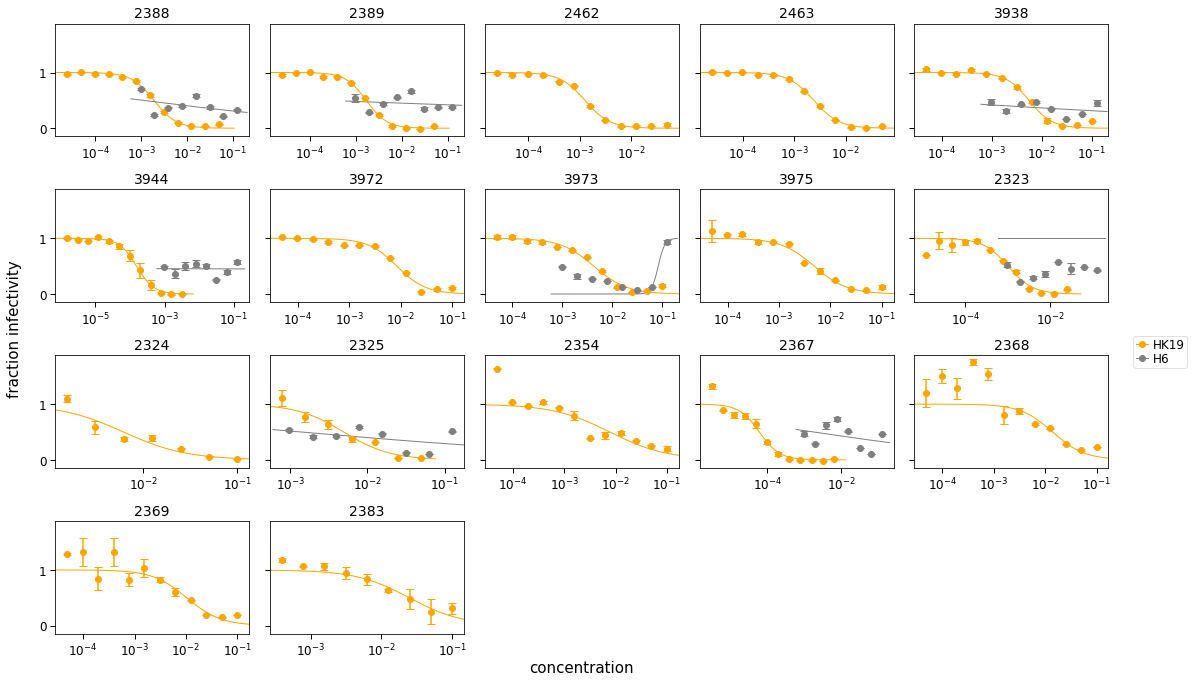

In [17]:
fig, axes = fits.plotSera(ncol=5,
                          virus_to_color_marker={
                              'HK19': ('orange', 'o'),
                              'H6': ('gray', 'o')
                          },
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 11]])
plt.savefig('figures/230214_ped-sera-neuts_final.pdf', bbox_inches=bbox)

In [14]:
neuts_final_selections = neut_data_final.loc[(neut_data_final['serum'] == 2367) |
                                         (neut_data_final['serum'] == 3944) |
                                         (neut_data_final['serum'] == 2462) |
                                         (neut_data_final['serum'] == 2389) |
                                         (neut_data_final['serum'] == 2323)]

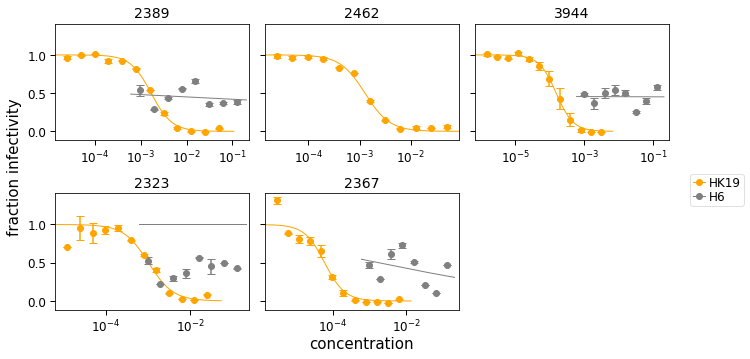

In [19]:
fits_final = neutcurve.CurveFits(neuts_final_selections)

fig, axes = fits_final.plotSera(ncol=3,
                          virus_to_color_marker={
                              'HK19': ('orange', 'o'),
                              'H6': ('gray', 'o')
                          },
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [11, 6]])
plt.savefig('figures/230214_ped-sera-neuts_most-potent.pdf', bbox_inches=bbox)

In [12]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
20,2367,HK19,average,2,0.001086,interpolated,0.00109,6.000133e-05,1.586662,1,0
8,3944,HK19,average,2,0.002136,interpolated,0.00214,1.543605e-04,1.748936,1,0
4,2462,HK19,average,2,0.016364,interpolated,0.0164,1.266453e-03,1.795750,1,0
2,2389,HK19,average,2,0.018311,interpolated,0.0183,1.676405e-03,1.921978,1,0
14,2323,HK19,average,2,0.022235,interpolated,0.0222,1.021694e-03,1.491825,1,0
0,2388,HK19,average,2,0.025378,interpolated,0.0254,1.914663e-03,1.778067,1,0
5,2463,HK19,average,2,0.031925,interpolated,0.0319,2.381352e-03,1.770261,1,0
12,3973,H6,average,2,0.041715,interpolated,0.0417,8.372986e-02,-6.595210,1,0
17,2325,HK19,average,2,0.050000,lower,>0.05,4.909473e-03,1.435841,1,0
6,3938,HK19,average,2,0.064815,interpolated,0.0648,5.550385e-03,1.869706,1,0


In [9]:
neut_data_top5 = pd.read_csv('neut_data/230215_final-neuts_tidy.csv')

fits_top5 = neutcurve.CurveFits(neut_data_top5)

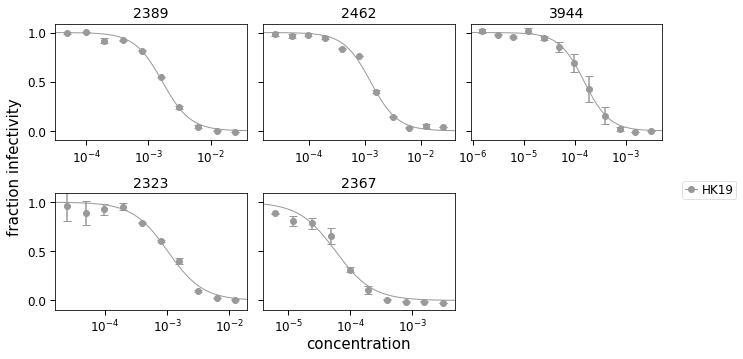

In [10]:
fig, axes = fits_top5.plotSera(ncol=3,
#                           virus_to_color_marker={
#                               'HK19': ('orange', 'o'),
#                               'H6': ('gray', 'o')
#                           },
                          sharex = False
                         )

# bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 11]])
# plt.savefig('figures/230214_ped-sera-neuts_final.pdf', bbox_inches=bbox)

In [8]:
serum_ic99 = fits_top5.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
4,2367,HK19,average,2,0.000549,interpolated,0.000549,0.000079,2.280828,0.852302,0
2,3944,HK19,average,2,0.002000,interpolated,0.002,0.000158,1.806033,0.986558,0
3,2323,HK19,average,2,0.012500,lower,>0.0125,0.001161,1.791093,0.937260,0
1,2462,HK19,average,2,0.013448,interpolated,0.0134,0.001334,1.975136,0.969001,0
0,2389,HK19,average,2,0.016192,interpolated,0.0162,0.001744,2.051065,0.975405,0


In [11]:
serum_ic99 = fits_top5.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
4,2367,HK19,average,2,0.001360,interpolated,0.00136,0.000058,1.460079,1,0
2,3944,HK19,average,2,0.002136,interpolated,0.00214,0.000154,1.749001,1,0
3,2323,HK19,average,2,0.012500,lower,>0.0125,0.001023,1.534783,1,0
1,2462,HK19,average,2,0.016202,interpolated,0.0162,0.001266,1.802666,1,0
0,2389,HK19,average,2,0.018183,interpolated,0.0182,0.001676,1.927579,1,0


In [2]:
neut_data_run3 = pd.read_csv('neut_data/230217_neuts_tidy.csv')

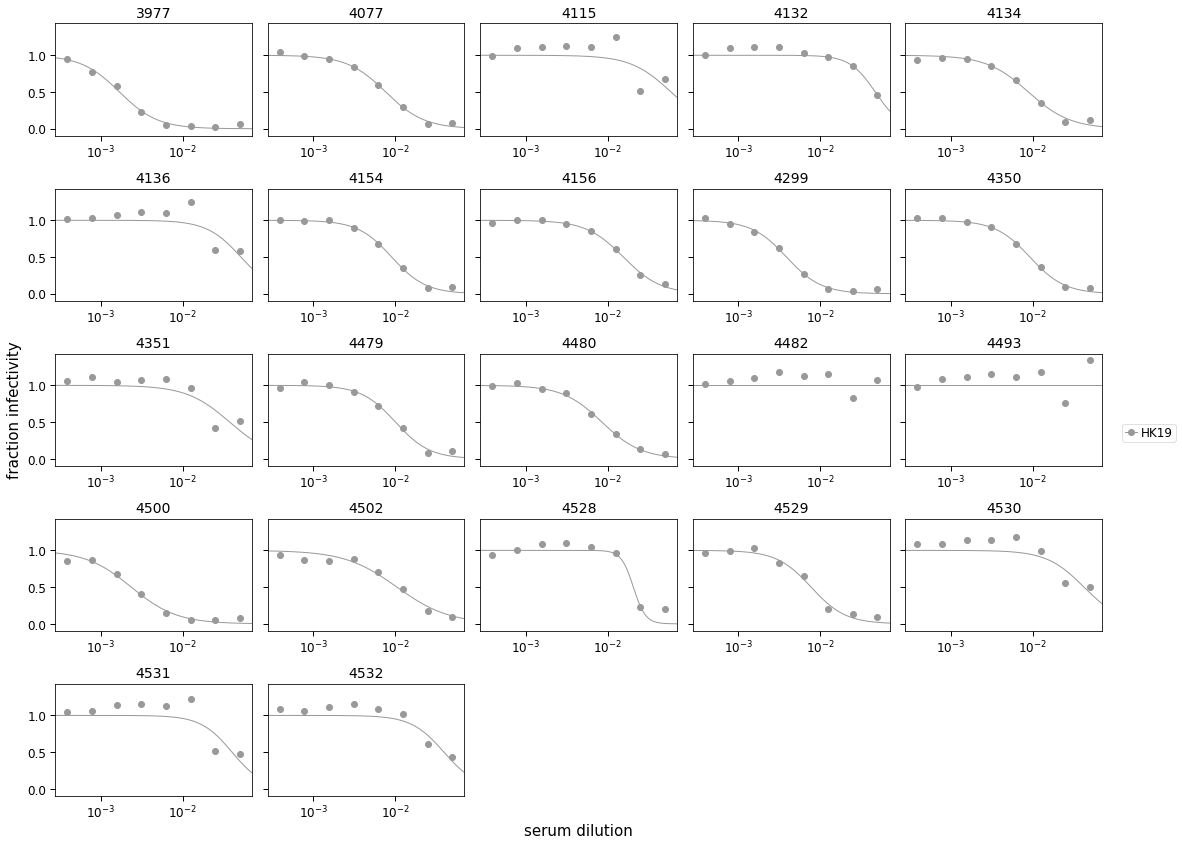

In [4]:
fits = neutcurve.CurveFits(neut_data_run3)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 13]])
plt.savefig('figures/230217_ped-sera-neuts.pdf', bbox_inches=bbox)

In [5]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
0,3977,HK19,average,1,0.019974,interpolated,0.02,0.001696,1.863327,1,0
8,4299,HK19,average,1,0.036645,interpolated,0.0366,0.003869,2.043739,1,0
15,4500,HK19,average,1,0.045013,interpolated,0.045,0.002359,1.558366,1,0
17,4528,HK19,average,1,0.045015,interpolated,0.045,0.020568,5.866561,1,0
19,4530,HK19,average,1,0.050000,lower,>0.05,0.042211,1.907191,1,0
18,4529,HK19,average,1,0.050000,lower,>0.05,0.007734,2.065838,1,0
16,4502,HK19,average,1,0.050000,lower,>0.05,0.010528,1.361824,1,0
14,4493,HK19,average,1,0.050000,lower,>0.05,0.473468,9.783459,1,0
13,4482,HK19,average,1,0.050000,lower,>0.05,0.884671,8.284614,1,0
12,4480,HK19,average,1,0.050000,lower,>0.05,0.008497,1.810801,1,0


In [6]:
neut_data_run4 = pd.read_csv('neut_data/230223_neuts_tidy.csv')

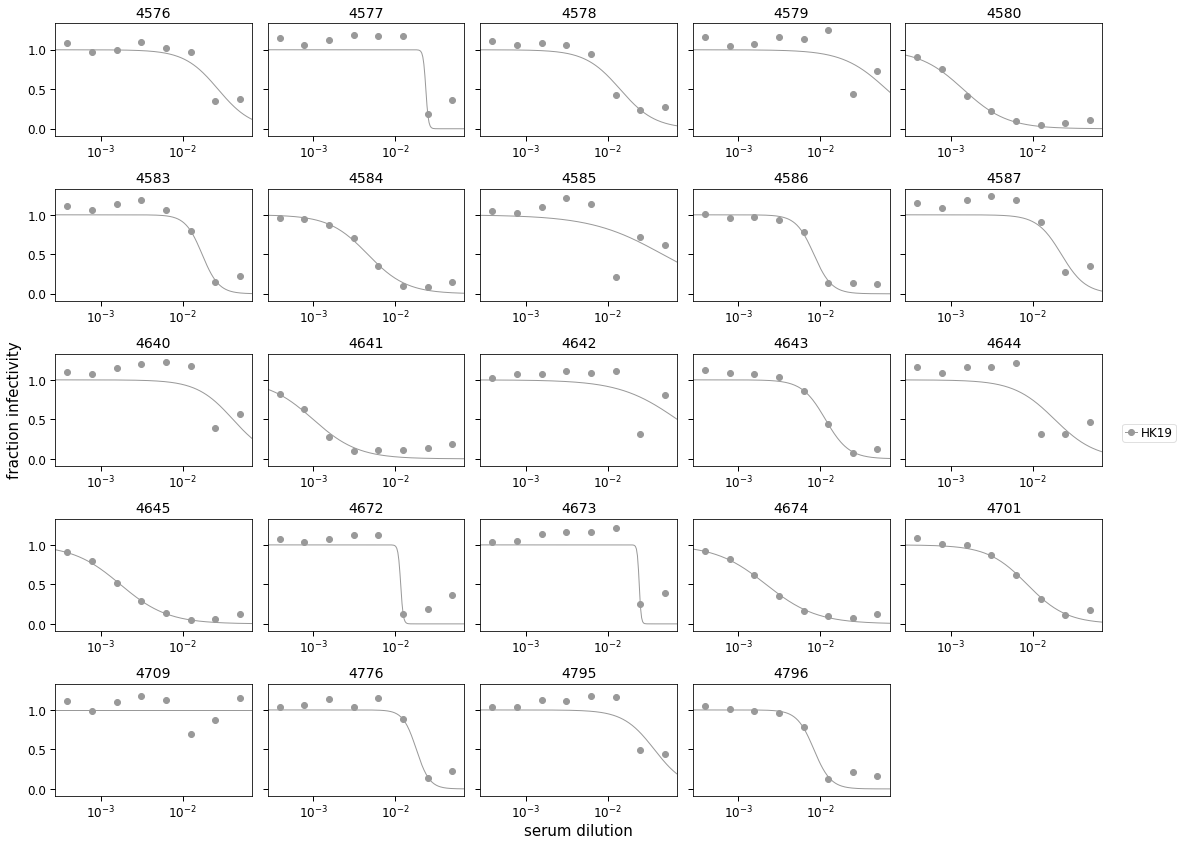

In [7]:
fits = neutcurve.CurveFits(neut_data_run4)

fig, axes = fits.plotSera(ncol=5,
                          xlabel='serum dilution',
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 13]])
# plt.savefig('figures/230217_ped-sera-neuts.pdf', bbox_inches=bbox)

In [8]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
16,4672,HK19,average,1,0.013755,interpolated,0.0138,0.011681,28.115631,1,0
11,4641,HK19,average,1,0.018520,interpolated,0.0185,0.000995,1.571487,1,0
4,4580,HK19,average,1,0.024180,interpolated,0.0242,0.001414,1.618716,1,0
23,4796,HK19,average,1,0.024927,interpolated,0.0249,0.008360,4.206362,1,0
8,4586,HK19,average,1,0.026383,interpolated,0.0264,0.008351,3.994531,1,0
17,4673,HK19,average,1,0.027479,interpolated,0.0275,0.024261,36.896569,1,0
1,4577,HK19,average,1,0.028057,interpolated,0.0281,0.023691,27.168508,1,0
15,4645,HK19,average,1,0.037605,interpolated,0.0376,0.001731,1.492706,1,0
21,4776,HK19,average,1,0.042703,interpolated,0.0427,0.018142,5.368007,1,0
2,4578,HK19,average,1,0.050000,lower,>0.05,0.014169,2.032099,1,0


In [2]:
neut_data = pd.read_csv('neut_data/230228_neuts_tidy.csv')

In [3]:
# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data)

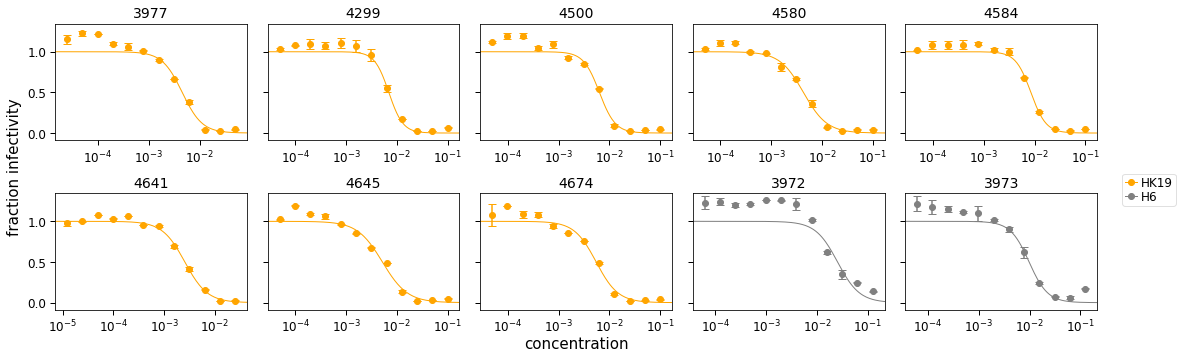

In [5]:
fig, axes = fits.plotSera(ncol=5,
                          virus_to_color_marker={
                              'HK19': ('orange', 'o'),
                              'H6': ('gray', 'o')
                          },
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 6]])
plt.savefig('figures/230228_ped-sera-neuts.pdf', bbox_inches=bbox)

In [15]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
5,4641,HK19,average,2,0.025000,lower,>0.025,0.002448,1.848774,1.027221,0
1,4299,HK19,average,2,0.036703,interpolated,0.0367,0.006442,2.686682,1.081956,0
4,4584,HK19,average,2,0.049031,interpolated,0.049,0.007871,2.550186,1.071609,0
0,3977,HK19,average,2,0.050000,lower,>0.05,0.003519,1.568061,1.157098,0
2,4500,HK19,average,2,0.060239,interpolated,0.0602,0.005320,1.941457,1.122338,0
3,4580,HK19,average,2,0.070861,interpolated,0.0709,0.003802,1.593824,1.068643,0
7,4674,HK19,average,2,0.092741,interpolated,0.0927,0.004585,1.558289,1.094105,0
6,4645,HK19,average,2,0.100000,lower,>0.1,0.004320,1.440564,1.092938,0
8,3972,H6,average,2,0.125000,lower,>0.125,0.018162,1.514166,1.253217,0
9,3973,H6,average,2,0.125000,lower,>0.125,0.007842,1.625483,1.162661,0


In [2]:
neut_data_teens = pd.read_csv('neut_data/230303_neuts_tidy.csv')

In [3]:
# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_teens)

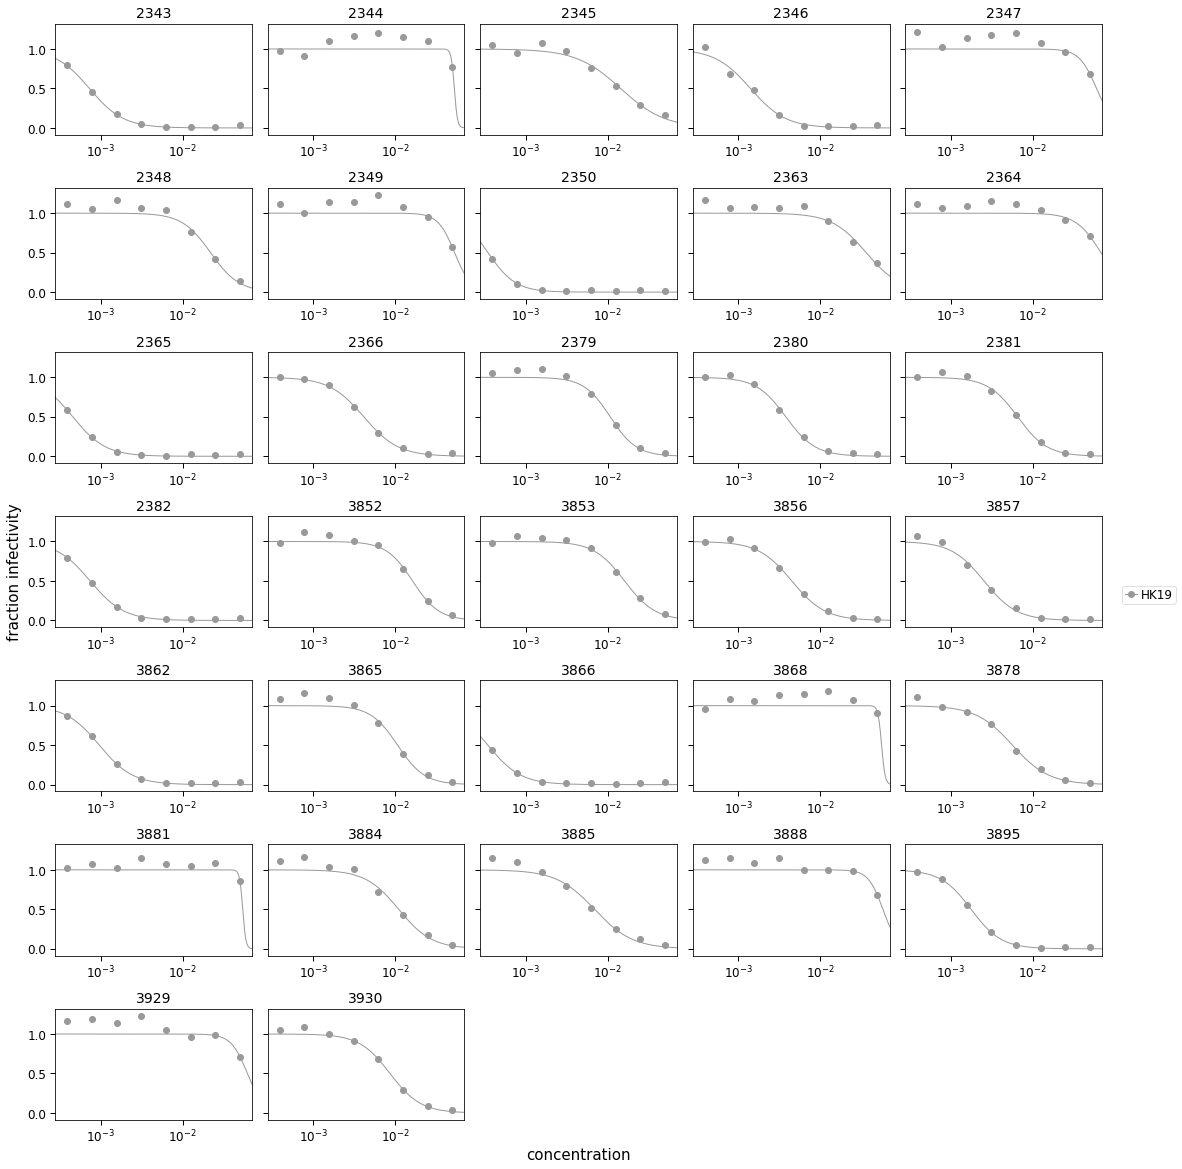

In [7]:
fig, axes = fits.plotSera(ncol=5,
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 17]])
plt.savefig('figures/230303_teen-sera-neuts.pdf', bbox_inches=bbox)

In [2]:
neut_data_teens_final = pd.read_csv('neut_data/230307_neuts_tidy.csv')

In [3]:
# fit with neutcurve package
fits = neutcurve.CurveFits(neut_data_teens_final)

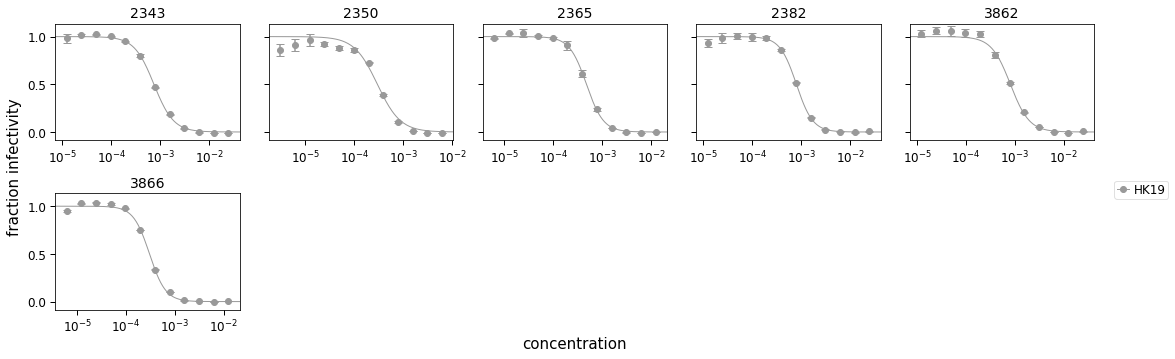

In [4]:
fig, axes = fits.plotSera(ncol=5,
                          sharex = False
                         )

bbox = matplotlib.transforms.Bbox([[0, 0], [17.5, 17]])
# plt.savefig('figures/230303_teen-sera-neuts.pdf', bbox_inches=bbox)

In [5]:
serum_ic99 = fits.fitParams(ics=[99])
serum_ic99.sort_values('ic99')

,serum,virus,replicate,nreplicates,ic99,ic99_bound,ic99_str,midpoint,slope,top,bottom
5,3866,HK19,average,2,0.001737,interpolated,0.00174,0.000304,2.634083,1,0
2,2365,HK19,average,2,0.003005,interpolated,0.00301,0.000477,2.496628,1,0
1,2350,HK19,average,2,0.003603,interpolated,0.0036,0.000296,1.839504,1,0
3,2382,HK19,average,2,0.004743,interpolated,0.00474,0.000801,2.583242,1,0
0,2343,HK19,average,2,0.006258,interpolated,0.00626,0.000748,2.163454,1,0
4,3862,HK19,average,2,0.006307,interpolated,0.00631,0.000813,2.242576,1,0


In [6]:
serum_ic90 = fits.fitParams(ics=[90])
serum_ic90.sort_values('ic90')

,serum,virus,replicate,nreplicates,ic90,ic90_bound,ic90_str,midpoint,slope,top,bottom
5,3866,HK19,average,2,0.000699,interpolated,0.000699,0.000304,2.634083,1,0
1,2350,HK19,average,2,0.000978,interpolated,0.000978,0.000296,1.839504,1,0
2,2365,HK19,average,2,0.001150,interpolated,0.00115,0.000477,2.496628,1,0
3,2382,HK19,average,2,0.001875,interpolated,0.00187,0.000801,2.583242,1,0
0,2343,HK19,average,2,0.002066,interpolated,0.00207,0.000748,2.163454,1,0
4,3862,HK19,average,2,0.002165,interpolated,0.00216,0.000813,2.242576,1,0
